<a href="https://colab.research.google.com/github/arturomolin/Tarea1/blob/main/Ejercicio24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

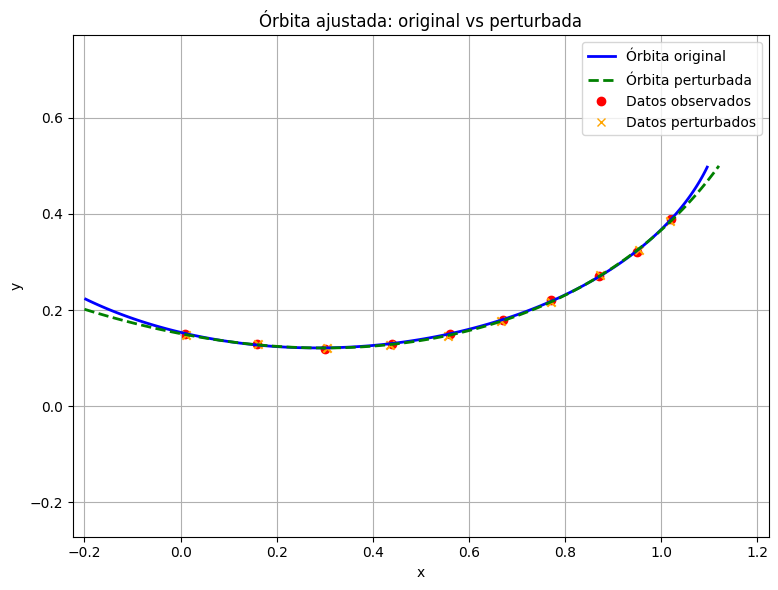


--- Comparación de parámetros ---
Parámetros originales:  [-2.6356  0.1436  0.5514  3.2229 -0.4329]
Parámetros perturbados: [-1.0078 -0.7525  0.6871  3.2528 -0.468 ]
Diferencia:             [ 1.6278 -0.8961  0.1357  0.0299 -0.0351]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
from matplotlib.lines import Line2D  # Para leyendas personalizadas

# -------------------------
# Paso 1: Datos observados
# -------------------------
x_data = np.array([1.02, 0.95, 0.87, 0.77, 0.67,
                   0.56, 0.44, 0.30, 0.16, 0.01])
y_data = np.array([0.39, 0.32, 0.27, 0.22, 0.18,
                   0.15, 0.13, 0.12, 0.13, 0.15])

# ------------------------------------------------------
# Paso 2: Ajuste por mínimos cuadrados (sin perturbación)
# ------------------------------------------------------

# Modelo: a*y^2 + b*x*y + c*x + d*y + e = x^2
A = np.column_stack([
    y_data**2,            # y^2
    x_data * y_data,      # x*y
    x_data,               # x
    y_data,               # y
    np.ones_like(x_data)  # término constante
])

b = x_data**2  # Lado derecho de la ecuación

# Resolver por mínimos cuadrados
params, _, _, _ = lstsq(A, b, rcond=None)
a, b_coef, c, d, e = params

# -------------------------------
# Paso 3: Graficar la órbita ajustada
# -------------------------------

x_vals = np.linspace(-0.2, 1.2, 400)
y_vals = np.linspace(0, 0.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluar la ecuación implícita en la malla
Z = a*Y**2 + b_coef*X*Y + c*X + d*Y + e - X**2

# --------------------------------
# Paso 4: Perturbar los datos
# --------------------------------

np.random.seed(42)  # Para reproducibilidad
pert_x = x_data + np.random.uniform(-0.005, 0.005, size=x_data.shape)
pert_y = y_data + np.random.uniform(-0.005, 0.005, size=y_data.shape)

# -------------------------------
# Paso 5: Resolver con datos perturbados
# -------------------------------

A_pert = np.column_stack([
    pert_y**2,
    pert_x * pert_y,
    pert_x,
    pert_y,
    np.ones_like(pert_x)
])
b_pert = pert_x**2

params_pert, _, _, _ = lstsq(A_pert, b_pert, rcond=None)
a_p, b_p, c_p, d_p, e_p = params_pert

Z_pert = a_p*Y**2 + b_p*X*Y + c_p*X + d_p*Y + e_p - X**2

# -------------------------------
# Paso 6: Graficar todo correctamente
# -------------------------------

plt.figure(figsize=(8, 6))

# Curva de nivel de la órbita original
contour1 = plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=2)

# Curva de nivel de la órbita con datos perturbados
contour2 = plt.contour(X, Y, Z_pert, levels=[0], colors='green', linestyles='--', linewidths=2)

# Puntos de datos originales
plt.scatter(x_data, y_data, color='red', label='Datos observados')

# Puntos de datos perturbados
plt.scatter(pert_x, pert_y, color='orange', label='Datos perturbados', marker='x')

# Leyenda personalizada
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, label='Órbita original'),
    Line2D([0], [0], color='green', lw=2, linestyle='--', label='Órbita perturbada'),
    Line2D([0], [0], color='red', marker='o', linestyle='', label='Datos observados'),
    Line2D([0], [0], color='orange', marker='x', linestyle='', label='Datos perturbados')
]
plt.legend(handles=custom_lines)

# Estética de la gráfica
plt.title('Órbita ajustada: original vs perturbada')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')  # Relación de aspecto 1:1
plt.tight_layout()
plt.show()

# -------------------------------
# Paso 7: Comparar parámetros
# -------------------------------

param_original = np.array([a, b_coef, c, d, e])
param_perturbado = np.array([a_p, b_p, c_p, d_p, e_p])
diferencia = param_perturbado - param_original

# Mostrar resultados
print("\n--- Comparación de parámetros ---")
print("Parámetros originales: ", np.round(param_original, 4))
print("Parámetros perturbados:", np.round(param_perturbado, 4))
print("Diferencia:            ", np.round(diferencia, 4))
